In [2]:
using MPSTime

In [1]:
using JLD2
using Plots
using JSON
using StatsPlots
using Plots.PlotMeasures
using Statistics

In [9]:
f_1_10 = jldopen("kepler_bench_c6_f_1_10.jld2", "r");
folds_1_10 = read(f_1_10, "fscores");
f_11_20 = jldopen("kepler_bench_c6_f_11_20.jld2", "r");
folds_11_20 = read(f_11_20, "fscores");
f_21_30 = jldopen("kepler_bench_c6_f_21_30.jld2", "r");
folds_21_30 = read(f_21_30, "fscores");
# combine folds
fscores_c6 = vcat(folds_1_10, folds_11_20, folds_21_30);

f_1_10_c4 = jldopen("kepler_bench_c4_f_1_10.jld2", "r");
folds_1_10_c4 = read(f_1_10_c4, "fscores");
f_11_20_c4 = jldopen("kepler_bench_c4_f_11_20.jld2", "r");
folds_11_20_c4 = read(f_11_20_c4, "fscores");
f_21_30_c4 = jldopen("kepler_bench_c4_f_21_30.jld2", "r");
folds_21_30_c4 = read(f_21_30_c4, "fscores");
fscores_c4 = vcat(folds_1_10_c4, folds_11_20_c4, folds_21_30_c4);

┌ Warning: type Main.FoldResults does not exist in workspace; reconstructing
└ @ JLD2 /home/noodles/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:622
┌ Warning: type Main.TSResults does not exist in workspace; reconstructing
└ @ JLD2 /home/noodles/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:622
┌ Warning: type Main.InstanceScores does not exist in workspace; reconstructing
└ @ JLD2 /home/noodles/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:622
┌ Warning: type Main.WindowScores does not exist in workspace; reconstructing
└ @ JLD2 /home/noodles/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:622
┌ Warning: type Main.FoldResults does not exist in workspace; reconstructing
└ @ JLD2 /home/noodles/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:622
┌ Warning: type Main.TSResults does not exist in workspace; reconstructing
└ @ JLD2 /home/noodles/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes

In [6]:
length(fscores_c6)

30

In [7]:
length(fscores_c6[1].ts_scores)

25

In [8]:
pm_map = Dict(5 => 1, 15 => 2, 25 => 3, 35 => 4, 45 => 5, 55 => 6, 65 => 7, 75 => 8, 85 => 9, 95 => 10)

Dict{Int64, Int64} with 10 entries:
  5  => 1
  15 => 2
  35 => 4
  25 => 3
  45 => 5
  55 => 6
  65 => 7
  95 => 10
  85 => 9
  75 => 8

In [17]:
fscores_c6[1].ts_scores[1].instance_scores[1].pm_scores[pm_map[5]].mps_scores

15-element Vector{Float64}:
 0.0029501748055535647
 0.005313552628648477
 0.004079728182251376
 0.0033858463015016597
 0.001423672893961224
 0.002778920837867586
 0.005704619793826034
 0.0012318315803650302
 0.0033649130410050394
 0.0033176261211617522
 0.004479044469768598
 0.0021436801748852563
 0.0048702858910907336
 0.002089732751370215
 0.006683987025542594

In [ ]:
function extract_fold_pm(fscores::Vector, fold_idx::Int, pm::Int)
    pm_map = Dict(5 => 1, 15 => 2, 25 => 3, 35 => 4, 45 => 5, 55 => 6, 65 => 7, 75 => 8, 85 => 9, 95 => 10)
    fold_marginalised = fscores[fold_idx]
    num_ts = length(fold_marginalised.ts_scores) # number of unique time series instances
    # loop over time series and extract the pm scores
    all_mps_pm_scores = []
    all_nn_pm_scores = []
    for ts in 1:num_ts
        per_instance_pm_scores_mps = []
        per_instance_pm_scores_nn = []
        num_instances = length(fold_marginalised.ts_scores[ts].instance_scores)
        for inst in 1:num_instances
            pm_marginalised = fold_marginalised.ts_scores[ts].instance_scores[inst].pm_scores[pm_map[pm]]
            push!(per_instance_pm_scores_mps, pm_marginalised.mps_scores)
            push!(per_instance_pm_scores_nn, pm_marginalised.nn_scores)
        end
        push!(all_mps_pm_scores, per_instance_pm_scores_mps...)
        push!(all_nn_pm_scores, per_instance_pm_scores_nn...)
    end
    return vcat(all_mps_pm_scores...), vcat(all_nn_pm_scores...)
end

extract_fold_pm (generic function with 1 method)

In [19]:
extract_fold_pm(fscores_c6, 1, 15)[1]

750-element Vector{Float64}:
 0.00439636801296923
 0.004130811630732847
 0.004057621378427966
 0.005180404371750485
 0.0040759670795453996
 0.003603141758921087
 0.004872404319011528
 0.0024995476123907097
 0.005424714495816507
 0.004233909652310251
 ⋮
 0.0016171232842974734
 0.0008102114629526472
 0.001845634088275587
 0.0015325211821646955
 0.0016121044785016624
 0.0016014799175259936
 0.0007132763621050249
 0.0018865715577135182
 0.0018645821836216201

In [20]:
mps_per_pm_30fold_mean_c6 = [mean([mean(extract_fold_pm(fscores_c6, fold, pm)[1]) for fold in 1:30]) for pm in 5:10:95]
mps_per_pm_30fold_std_err_c6 = [std([mean(extract_fold_pm(fscores_c6, fold, pm)[1]) for fold in 1:30])/sqrt(30) for pm in 5:10:95]
nn_per_pm_30fold_mean_c6 = [mean([mean(extract_fold_pm(fscores_c6, fold, pm)[2]) for fold in 1:30]) for pm in 5:10:95]
nn_per_pm_30fold_std_err_c6 = [std([mean(extract_fold_pm(fscores_c6, fold, pm)[2]) for fold in 1:30])/sqrt(30) for pm in 5:10:95]


10-element Vector{Float64}:
 3.679771480438338e-5
 3.103446732556659e-5
 3.254248026557359e-5
 3.238018647555209e-5
 3.188702721048779e-5
 3.1218400921538405e-5
 3.105542755721468e-5
 3.138148105621057e-5
 3.029854931892954e-5
 5.953515852293924e-5

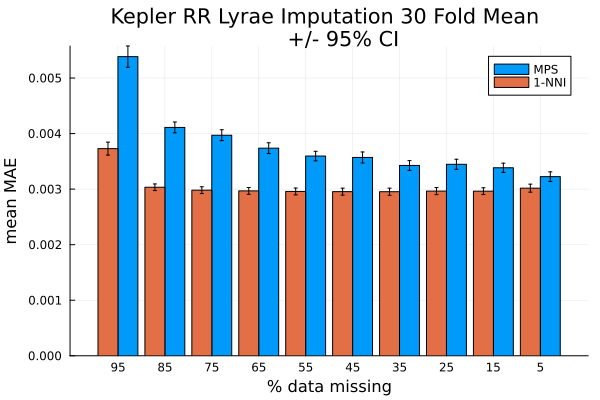

In [21]:
groupedbar([mps_per_pm_30fold_mean_c6 nn_per_pm_30fold_mean_c6], 
    yerr=[1.96*mps_per_pm_30fold_std_err_c6 1.96*nn_per_pm_30fold_std_err_c6],
    markersize=2,
    legend=:topright,
    bar_width=0.85,
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["MPS" "1-NNI"],
    title="Kepler RR Lyrae Imputation 30 Fold Mean 
    +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean MAE")
xflip!(true)
#savefig("kepler_c6_imputation_barplot_mps_nn_only.svg")

In [29]:
res_mps_c6, res_nn_c6 = mps_per_pm_30fold_mean_c6, nn_per_pm_30fold_mean_c6
std_mps_c6, std_nn_c6 = mps_per_pm_30fold_std_err_c6,nn_per_pm_30fold_std_err_c6

@save "KC6_paper.jld2" res_mps_c6 res_nn_c6 std_mps_c6 std_nn_c6

In [30]:
f_1_10_c4 = jldopen("kepler_bench_c4_f_1_10.jld2", "r");
folds_1_10_c4 = read(f_1_10_c4, "fscores");
f_11_20_c4 = jldopen("kepler_bench_c4_f_11_20.jld2", "r");
folds_11_20_c4 = read(f_11_20_c4, "fscores");
f_21_30_c4 = jldopen("kepler_bench_c4_f_21_30.jld2", "r");
folds_21_30_c4 = read(f_21_30_c4, "fscores");
fscores_c4 = vcat(folds_1_10_c4, folds_11_20_c4, folds_21_30_c4);

In [31]:
mps_per_pm_30fold_mean = [mean([mean(extract_fold_pm(fscores_c4, fold, pm)[1]) for fold in 1:30]) for pm in 5:10:95];
mps_per_pm_30fold_std_err = [std([mean(extract_fold_pm(fscores_c4, fold, pm)[1]) for fold in 1:30])/sqrt(30) for pm in 5:10:95]
nn_per_pm_30fold_mean = [mean([mean(extract_fold_pm(fscores_c4, f, pm)[2]) for f in 1:30]) for pm in 5:10:95];
nn_per_pm_30fold_std_err = [std([mean(extract_fold_pm(fscores_c4, fold, pm)[2]) for fold in 1:30])/sqrt(30) for pm in 5:10:95]

10-element Vector{Float64}:
 8.743176061704593e-8
 5.224836555421728e-8
 5.192984919113667e-8
 4.1546879699294234e-8
 4.113915725865878e-8
 3.8524149037960065e-8
 4.0133922743442924e-8
 3.6774199422415803e-8
 3.249228097108422e-8
 2.7583003174887436e-8

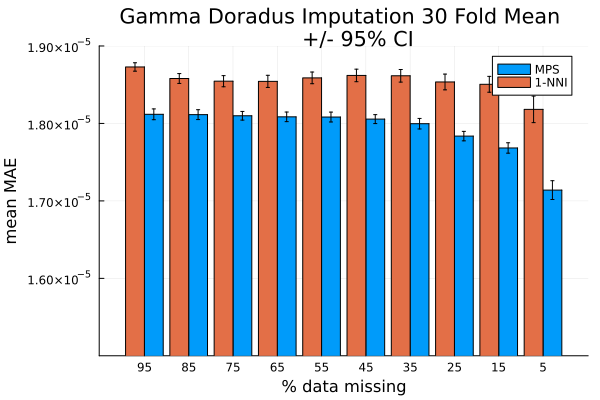

In [32]:
groupedbar([mps_per_pm_30fold_mean nn_per_pm_30fold_mean], 
    yerr=[1.96*mps_per_pm_30fold_std_err 1.96*nn_per_pm_30fold_std_err],
    markersize=2,
    legend=:topright,
    bar_width=0.85,
    ylims=(1.5e-5, 1.9e-5),
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["MPS" "1-NNI"],
    title="Gamma Doradus Imputation 30 Fold Mean 
    +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean MAE")
xflip!(true)
#savefig("kepler_c4_imputation_barplot_mps_nn_only.svg")

In [34]:
res_mps_c4, res_nn_c4 = mps_per_pm_30fold_mean, nn_per_pm_30fold_mean
std_mps_c4, std_nn_c4 = mps_per_pm_30fold_std_err,nn_per_pm_30fold_std_err

@save "KC4_paper.jld2" res_mps_c4 res_nn_c4 std_mps_c4 std_nn_c4

# Combining Results

In [17]:
# load the original time series folds
c4_ts_folds_f = jldopen("../kepler_c4_folds.jld2", "r")
c4_ts_folds = read(c4_ts_folds_f, "folds");

In [18]:
max_val = maximum(maximum(vcat(c4_ts_folds[1][2][1]'...), dims=2))
min_val = minimum(minimum(vcat(c4_ts_folds[1][2][1]'...), dims=2))
range = max_val - min_val

0.00013082589411195222

In [19]:
max_val = maximum(maximum(vcat(vcat(c4_ts_folds[1][1][1], c4_ts_folds[1][2][1])'...), dims=2))
min_val = minimum(minimum(vcat(vcat(c4_ts_folds[1][1][1], c4_ts_folds[1][2][1])'...), dims=2))
r = max_val - min_val

0.0002060463509944157

In [20]:
function normalise_scores(scores, ts_folds)
    # make a copy of scores to modify with normalised values
    ranges = Dict()
    for fold in 1:1 # since all folds contain the same time series, just shuffled windows, ranges will be identical across folds
        # loop over folds
        ts_ranges = Dict()
        for ts in 1:length(scores[fold].ts_scores)
            # for each time series extract the range from all windows (train + test)
            all_windows_max = maximum(maximum(vcat(vcat(ts_folds[fold][1][ts], ts_folds[fold][2][ts])'...), dims=2))
            all_windows_min = minimum(minimum(vcat(vcat(ts_folds[fold][1][ts], ts_folds[fold][2][ts])'...), dims=2))
            all_windows_range = all_windows_max - all_windows_min
            ts_ranges[ts] = all_windows_range
        end
        ranges[fold] = ts_ranges
    end
    return ranges
end

normalise_scores (generic function with 1 method)

In [21]:
ranges_c4 = normalise_scores(fscores_c4, c4_ts_folds);

In [22]:
function extract_fold_pm_with_normalised_scores(fscores::Vector, fold_idx::Int, pm::Int, ranges::Dict)
    pm_map = Dict(5 => 1, 15 => 2, 25 => 3, 35 => 4, 45 => 5, 55 => 6, 65 => 7, 75 => 8, 85 => 9, 95 => 10)
    fold_marginalised = fscores[fold_idx]
    num_ts = length(fold_marginalised.ts_scores) # number of unique time series instances
    # loop over time series and extract the pm scores
    all_mps_pm_scores = []
    all_nn_pm_scores = []
    for ts in 1:num_ts
        per_instance_pm_scores_mps = []
        per_instance_pm_scores_nn = []
        num_instances = length(fold_marginalised.ts_scores[ts].instance_scores)
        ts_range = ranges[1][ts] # get the range for a given time series to normalise the MAE
        for inst in 1:num_instances
            pm_marginalised = fold_marginalised.ts_scores[ts].instance_scores[inst].pm_scores[pm_map[pm]]
            pm_marginalised_mps = pm_marginalised.mps_scores ./ ts_range
            pm_marginalised_nn = pm_marginalised.nn_scores ./ ts_range 
            push!(per_instance_pm_scores_mps, pm_marginalised_mps)
            push!(per_instance_pm_scores_nn, pm_marginalised_nn)
        end
        push!(all_mps_pm_scores, per_instance_pm_scores_mps...)
        push!(all_nn_pm_scores, per_instance_pm_scores_nn...)
    end
    return vcat(all_mps_pm_scores...), vcat(all_nn_pm_scores...)
end

extract_fold_pm_with_normalised_scores (generic function with 1 method)

Re-compute the scores using normalisation

In [23]:
mps_per_pm_30fold_mean_n_c4 = [mean([mean(extract_fold_pm_with_normalised_scores(fscores_c4, fold, pm, ranges_c4)[1]) for fold in 1:30]) for pm in 5:10:95];
mps_per_pm_30fold_std_err_n_c4 = [std([mean(extract_fold_pm_with_normalised_scores(fscores_c4, fold, pm, ranges_c4)[1]) for fold in 1:30])/sqrt(30) for pm in 5:10:95]
nn_per_pm_30fold_mean_n_c4 = [mean([mean(extract_fold_pm_with_normalised_scores(fscores_c4, fold, pm, ranges_c4)[2]) for fold in 1:30]) for pm in 5:10:95];
nn_per_pm_30fold_std_err_n_c4 = [std([mean(extract_fold_pm_with_normalised_scores(fscores_c4, fold, pm, ranges_c4)[2]) for fold in 1:30])/sqrt(30) for pm in 5:10:95]

10-element Vector{Float64}:
 0.0006022102632426657
 0.00039516852865437754
 0.00032968099321203806
 0.0002967714905783841
 0.0002969810379134712
 0.0002799407193804134
 0.0002639313799690924
 0.0002525757515212965
 0.00022502741419697228
 0.00024731127197661425

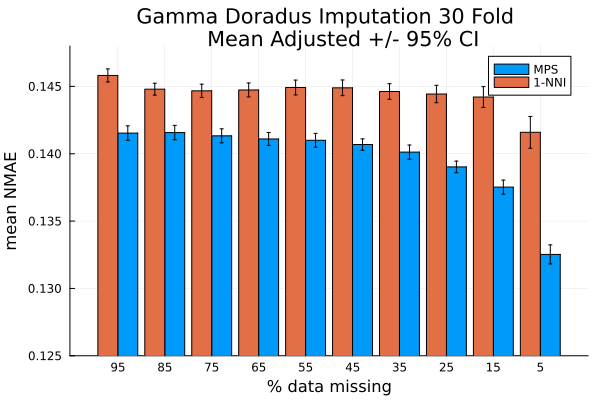

In [24]:
groupedbar([mps_per_pm_30fold_mean_n_c4 nn_per_pm_30fold_mean_n_c4], 
    yerr=[1.96*mps_per_pm_30fold_std_err_n_c4 1.96*nn_per_pm_30fold_std_err_n_c4],
    markersize=2,
    legend=:topright,
    bar_width=0.85,
    ylims=(0.125, 0.148),
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["MPS" "1-NNI"],
    title="Gamma Doradus Imputation 30 Fold 
    Mean Adjusted +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean NMAE")
xflip!(true)
#savefig("kepler_c4_imputation_barplot_mps_nn_only_final.svg")

Now for class 6

In [25]:
# load the folds for class 6
c6_ts_folds_f = jldopen("../kepler_c6_folds.jld2")
c6_ts_folds = read(c6_ts_folds_f, "folds");
ranges_c6 = normalise_scores(fscores_c6, c6_ts_folds);

In [26]:
mps_per_pm_30fold_mean_n_c6 = [mean([mean(extract_fold_pm_with_normalised_scores(fscores_c6, fold, pm, ranges_c6)[1]) for fold in 1:30]) for pm in 5:10:95];
mps_per_pm_30fold_std_err_n_c6 = [std([mean(extract_fold_pm_with_normalised_scores(fscores_c6, fold, pm, ranges_c6)[1]) for fold in 1:30])/sqrt(30) for pm in 5:10:95]
nn_per_pm_30fold_mean_n_c6 = [mean([mean(extract_fold_pm_with_normalised_scores(fscores_c6, fold, pm, ranges_c6)[2]) for fold in 1:30]) for pm in 5:10:95];
nn_per_pm_30fold_std_err_n_c6 = [std([mean(extract_fold_pm_with_normalised_scores(fscores_c6, fold, pm, ranges_c6)[2]) for fold in 1:30])/sqrt(30) for pm in 5:10:95]

10-element Vector{Float64}:
 0.00038157368635931174
 0.0003269867517726579
 0.0003586548746688088
 0.00035603108031831735
 0.0003463821285442765
 0.00033582982345328494
 0.00033240399169764907
 0.0003342901158540493
 0.0003203074031532839
 0.000513548352290018

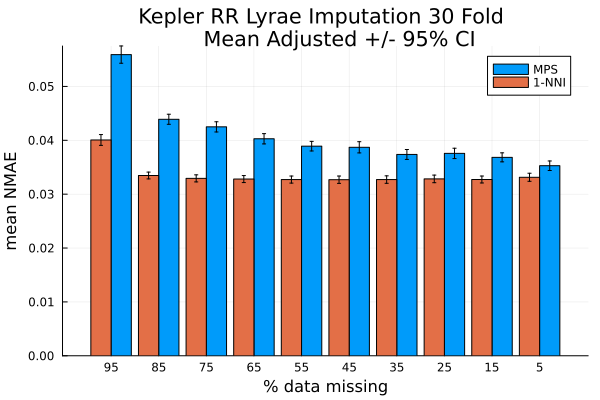

In [27]:
groupedbar([mps_per_pm_30fold_mean_n_c6 nn_per_pm_30fold_mean_n_c6], 
    yerr=[1.96*mps_per_pm_30fold_std_err_n_c6 1.96*nn_per_pm_30fold_std_err_n_c6],
    markersize=2,
    legend=:topright,
    bar_width=0.85,
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["MPS" "1-NNI"],
    title="Kepler RR Lyrae Imputation 30 Fold 
    Mean Adjusted +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean NMAE")
xflip!(true)
#savefig("kepler_c6_imputation_barplot_mps_nn_only_final.svg")

Combined results across both classes and all instances

In [28]:
15 * 50 * 2 # 15 window locations, 50 seperate time series (both classes), 2 test windows per time series

1500

In [29]:
mps_per_pm_30fold_mean_n_c4c6 = [mean([mean(vcat(extract_fold_pm_with_normalised_scores(fscores_c6, fold, pm, ranges_c6)[1], extract_fold_pm_with_normalised_scores(fscores_c4, fold, pm, ranges_c4)[1])) for fold in 1:30]) for pm in 5:10:95];
mps_per_pm_30fold_std_err_n_c4c6 = [std([mean(vcat(extract_fold_pm_with_normalised_scores(fscores_c6, fold, pm, ranges_c6)[1], extract_fold_pm_with_normalised_scores(fscores_c4, fold, pm, ranges_c4)[1])) for fold in 1:30])/sqrt(30) for pm in 5:10:95]
nn_per_pm_30fold_mean_n_c4c6 = [mean([mean(vcat(extract_fold_pm_with_normalised_scores(fscores_c6, fold, pm, ranges_c6)[2], extract_fold_pm_with_normalised_scores(fscores_c4, fold, pm, ranges_c4)[2])) for fold in 1:30]) for pm in 5:10:95];
nn_per_pm_30fold_std_err_n_c4c6 = [std([mean(vcat(extract_fold_pm_with_normalised_scores(fscores_c6, fold, pm, ranges_c6)[2], extract_fold_pm_with_normalised_scores(fscores_c4, fold, pm, ranges_c4)[2])) for fold in 1:30])/sqrt(30) for pm in 5:10:95]

10-element Vector{Float64}:
 0.00035374268024363056
 0.00026128881621537706
 0.00025438485497749654
 0.00023995263985416944
 0.0002352365577906017
 0.00023411691545793535
 0.0002422943630448719
 0.000233141253494797
 0.00021042517000948314
 0.0002753377182618232

In [30]:
pal = palette(:tab10)

In [31]:
group_colours = [pal[4] pal[2]]

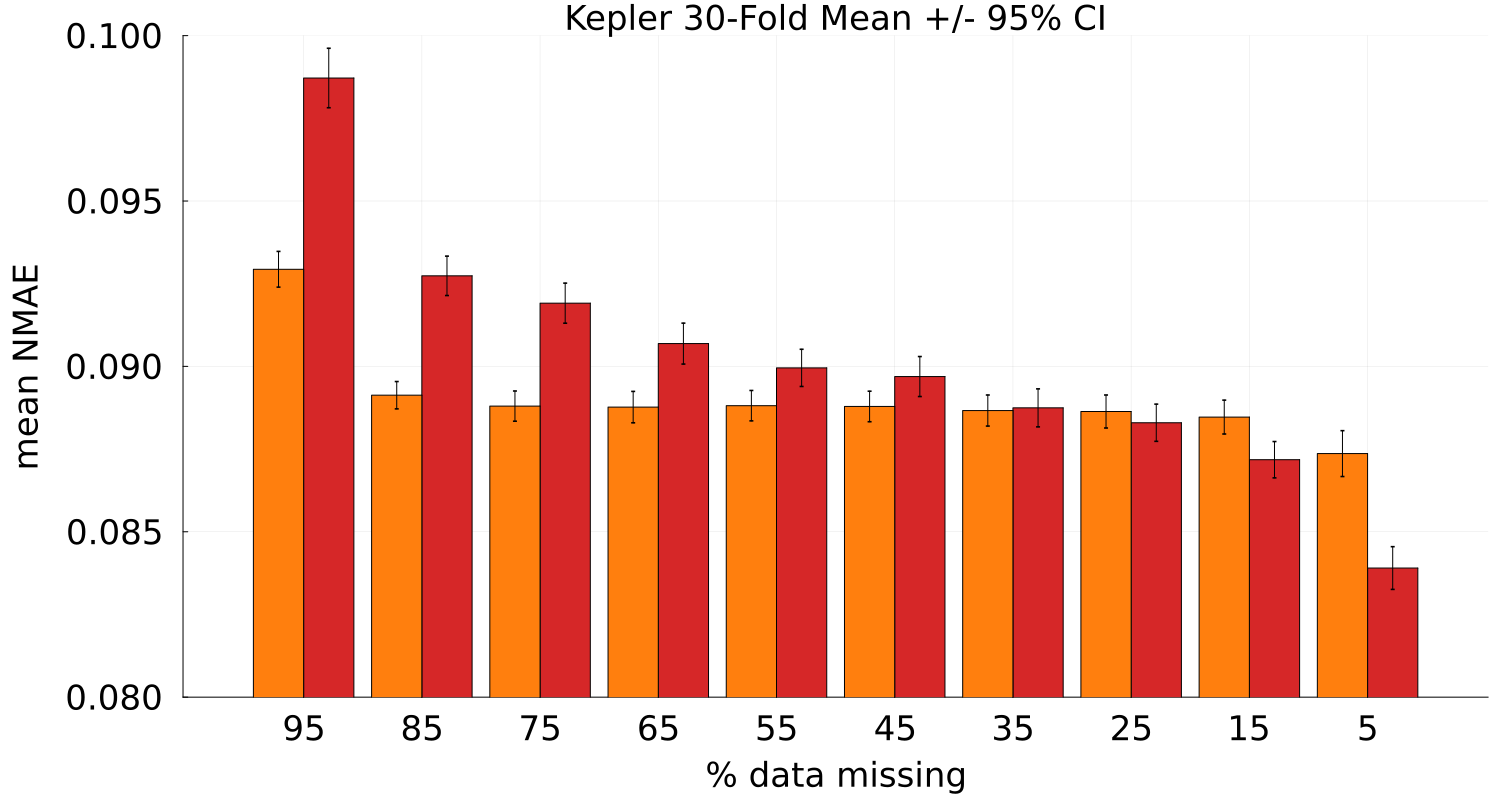

In [32]:
fstyle = font("sans-serif", 23)
groupedbar([mps_per_pm_30fold_mean_n_c4c6 nn_per_pm_30fold_mean_n_c4c6], 
    yerr=[1.96*mps_per_pm_30fold_std_err_n_c4c6 1.96*nn_per_pm_30fold_std_err_n_c4c6],
    markersize=2,
    legend=:none, #:outertopright,
    bar_width=0.85,
    ylims=(0.08, 0.1),
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    c=group_colours,
    label=["MPS" "1-NNI"],
    title="Kepler 30-Fold Mean +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean NMAE", 
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,size=(1500, 800),
    bottom_margin=10mm,
    left_margin=10mm)
xflip!(true)
#savefig("kepler_combined_imputation_barplot_mps_nn_only_final.svg")

# Load CSDI Results

In [33]:
kep_c4_csdi = JSON.parsefile("Python/kep_c4_csdi_results.json");
kep_c6_csdi = JSON.parsefile("Python/kep_c6_csdi_results.json");

In [34]:
csdi_per_pm_30fold_mean_c4 = [mean([mean(kep_c4_csdi["$f"]["$pm"]) for f in 0:29]) for pm in 0.05:0.10:0.95]
csdi_per_pm_30fold_mean_c6 = [mean([mean(kep_c6_csdi["$f"]["$pm"]) for f in 0:29]) for pm in 0.05:0.10:0.95];
csdi_per_pm_30fold_std_err_c4 = [std([mean(kep_c4_csdi["$f"]["$pm"]) for f in 0:29]) for pm in 0.05:0.10:0.95]/sqrt(30)
csdi_per_pm_30fold_std_err_c6 = [std([mean(kep_c6_csdi["$f"]["$pm"]) for f in 0:29]) for pm in 0.05:0.10:0.95]/sqrt(30);

In [35]:
csdi_per_pm_30fold_mean_c4c6 = [mean([mean(vcat(kep_c4_csdi["$f"]["$pm"], kep_c6_csdi["$f"]["$pm"])) for f in 0:29]) for pm in 0.05:0.10:0.95]
csdi_per_pm_30fold_std_err_c4c6 = [std([mean(vcat(kep_c4_csdi["$f"]["$pm"], kep_c6_csdi["$f"]["$pm"])) for f in 0:29])/sqrt(30) for pm in 0.05:0.10:0.95];

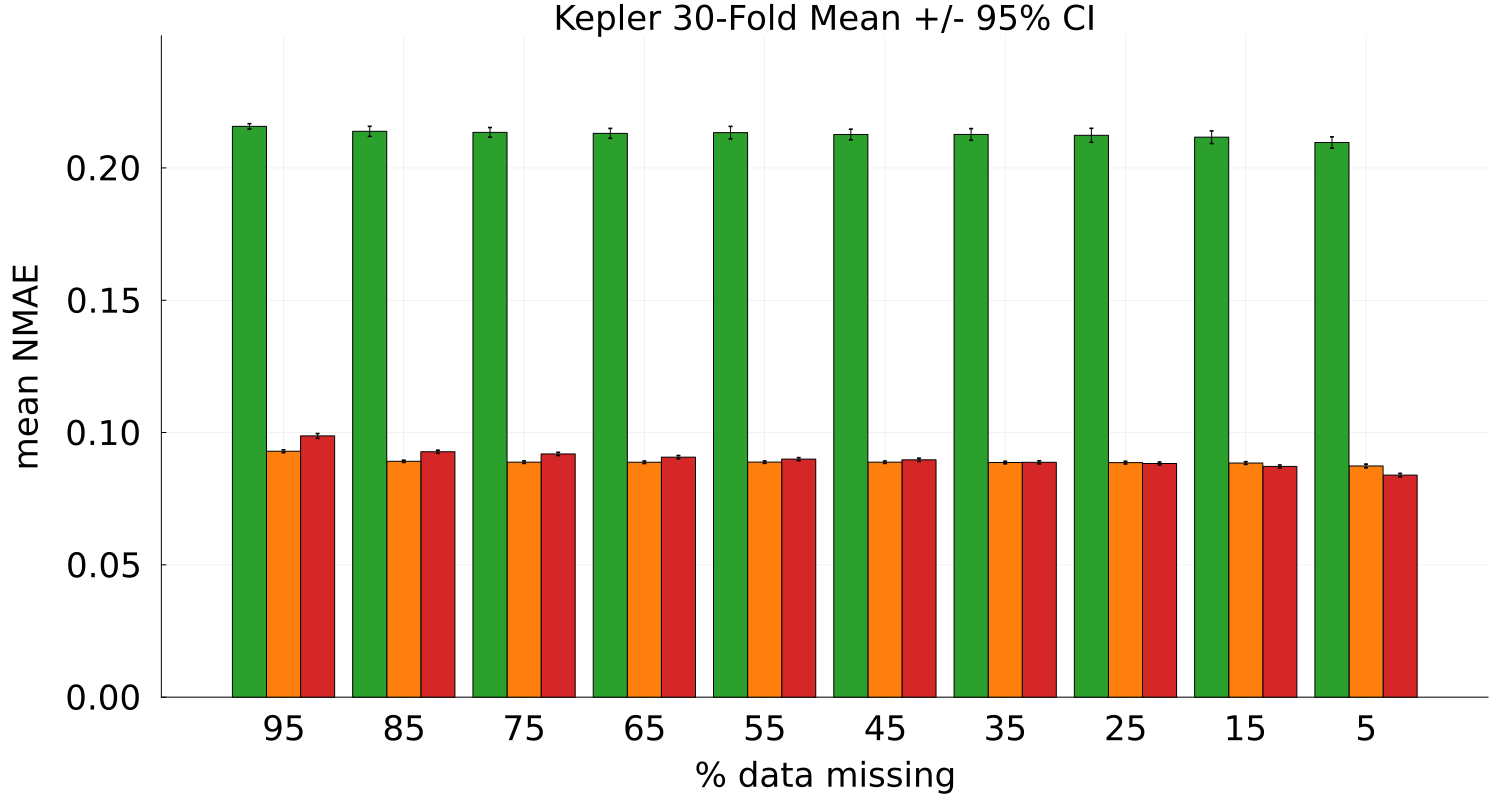

In [36]:
fstyle = font("sans-serif", 23)
groupedbar([mps_per_pm_30fold_mean_n_c4c6 nn_per_pm_30fold_mean_n_c4c6 csdi_per_pm_30fold_mean_c4c6], 
    yerr=[1.96*mps_per_pm_30fold_std_err_n_c4c6 1.96*nn_per_pm_30fold_std_err_n_c4c6 1.96*csdi_per_pm_30fold_std_err_c4c6],
    markersize=2,
    legend=:none, #:outertopright,
    bar_width=0.85,
    ylims=(0.0, 0.25),
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    c=[pal[4] pal[2] pal[3] pal[10]],
    label=["MPS" "1-NNI" "CSDI"],
    title="Kepler 30-Fold Mean +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean NMAE", 
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,size=(1500, 800),
    bottom_margin=10mm,
    left_margin=10mm)
xflip!(true)
#savefig("kepler_combined_imputation_barplot_3impute.svg")

# Load CDRec results

In [37]:
kep_c4_cdrec = JSON.parsefile("Python/kep_c4_cdrec_results.json");
kep_c6_cdrec = JSON.parsefile("Python/kep_c6_cdrec_results.json");

In [38]:
cdrec_per_pm_30fold_mean_c4 = [mean([mean(kep_c4_cdrec["$f"]["$pm"]) for f in 0:29]) for pm in 0.05:0.10:0.95]
cdrec_per_pm_30fold_std_err_c4 = [std([mean(kep_c4_cdrec["$f"]["$pm"]) for f in 0:29]) for pm in 0.05:0.10:0.95]/sqrt(30)
cdrec_per_pm_30fold_mean_c6 = [mean([mean(kep_c6_cdrec["$f"]["$pm"]) for f in 0:29]) for pm in 0.05:0.10:0.95]
cdrec_per_pm_30fold_std_err_c6 = [std([mean(kep_c6_cdrec["$f"]["$pm"]) for f in 0:29]) for pm in 0.05:0.10:0.95]/sqrt(30)

10-element Vector{Float64}:
 0.0007289313629995921
 0.0005391673475815938
 0.0004987753862782517
 0.0004978533906996882
 0.00046608923044036106
 0.0004111075087158719
 0.00043673921072551484
 0.0005229573062271472
 0.0009420955118053661
 0.001564310508444323

In [39]:
cdrec_per_pm_30fold_mean_c4c6 = [mean([mean(vcat(kep_c4_cdrec["$f"]["$pm"], kep_c6_cdrec["$f"]["$pm"])) for f in 0:29]) for pm in 0.05:0.10:0.95]
cdrec_per_pm_30fold_std_err_c4c6 = [std([mean(vcat(kep_c4_cdrec["$f"]["$pm"], kep_c6_cdrec["$f"]["$pm"])) for f in 0:29])/sqrt(30) for pm in 0.05:0.10:0.95];

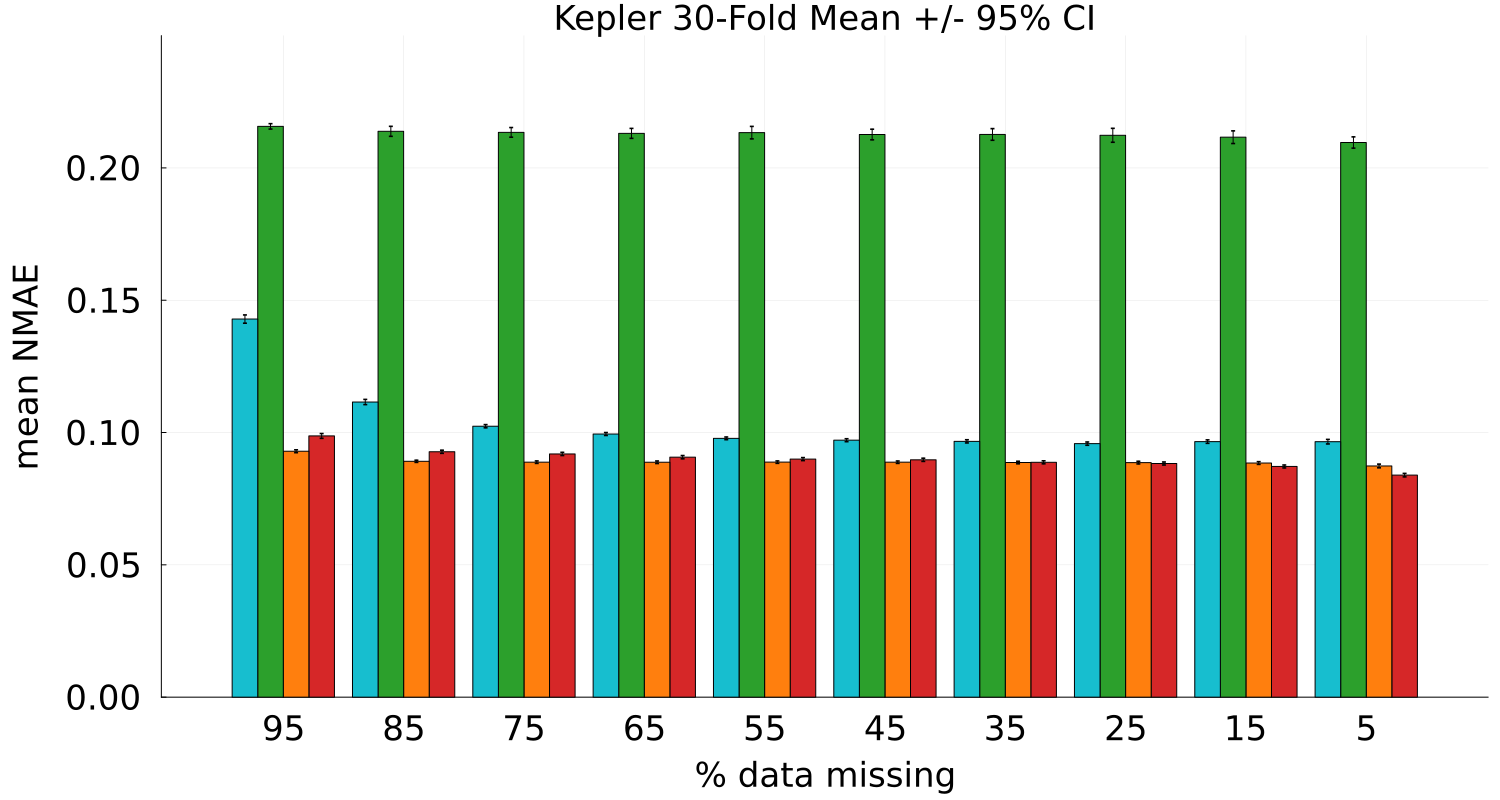

In [40]:
fstyle = font("sans-serif", 23)
groupedbar([mps_per_pm_30fold_mean_n_c4c6 nn_per_pm_30fold_mean_n_c4c6 csdi_per_pm_30fold_mean_c4c6 cdrec_per_pm_30fold_mean_c4c6], 
    yerr=[1.96*mps_per_pm_30fold_std_err_n_c4c6 1.96*nn_per_pm_30fold_std_err_n_c4c6 1.96*csdi_per_pm_30fold_std_err_c4c6 1.96*cdrec_per_pm_30fold_std_err_c4c6],
    markersize=2,
    legend=:none, #:outertopright,
    bar_width=0.85,
    ylims=(0.0, 0.25),
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    c=[pal[4] pal[2] pal[3] pal[10]],
    label=["MPS" "1-NNI" "CSDI" "CDRec"],
    title="Kepler 30-Fold Mean +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean NMAE", 
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,size=(1500, 800),
    bottom_margin=10mm,
    left_margin=10mm)
xflip!(true)
#savefig("kepler_combined_imputation_barplot_4impute.svg")

# Load BRITS Results

In [60]:
kep_c4_brits = JSON.parsefile("Python/kep_c4_brits_results.json");
kep_c6_brits = JSON.parsefile("Python/kep_c6_brits_results.json");
brits_per_pm_30fold_mean_c4 = [mean([mean(kep_c4_brits["$f"]["$pm"]) for f in 0:29]) for pm in 0.05:0.10:0.95]
brits_per_pm_30fold_std_err_c4 = [std([mean(kep_c4_brits["$f"]["$pm"]) for f in 0:29]) for pm in 0.05:0.10:0.95]/sqrt(30)
brits_per_pm_30fold_mean_c6 = [mean([mean(kep_c6_brits["$f"]["$pm"]) for f in 0:29]) for pm in 0.05:0.10:0.95]
brits_per_pm_30fold_std_err_c6 = [std([mean(kep_c6_brits["$f"]["$pm"]) for f in 0:29]) for pm in 0.05:0.10:0.95]/sqrt(30)

10-element Vector{Float64}:
 0.5658251503364405
 1.4925807285489652
 1.736316535448253
 1.8514322567920567
 1.9515558787796483
 2.0502943799660076
 2.173954824536462
 2.2192146375356163
 2.273187197435398
 2.3534042903609613

In [42]:
brits_per_pm_30fold_mean_c4c6 = [mean([mean(vcat(kep_c4_brits["$f"]["$pm"], kep_c6_brits["$f"]["$pm"])) for f in 0:29]) for pm in 0.05:0.10:0.95]
brits_per_pm_30fold_std_err_c4c6 = [std([mean(vcat(kep_c4_brits["$f"]["$pm"], kep_c6_brits["$f"]["$pm"])) for f in 0:29])/sqrt(30) for pm in 0.05:0.10:0.95];

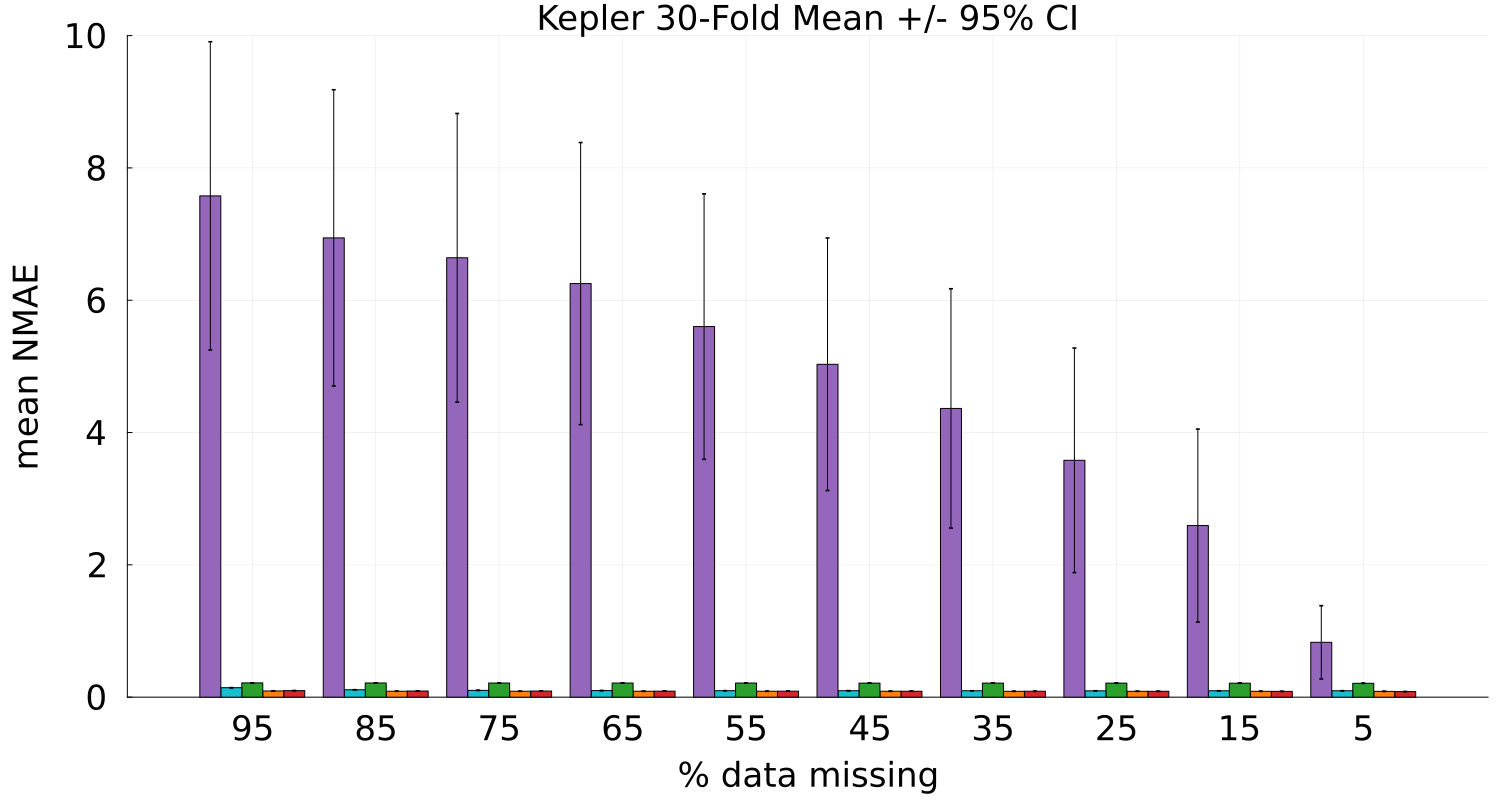

In [43]:
fstyle = font("sans-serif", 23)
groupedbar([mps_per_pm_30fold_mean_n_c4c6 nn_per_pm_30fold_mean_n_c4c6 csdi_per_pm_30fold_mean_c4c6 cdrec_per_pm_30fold_mean_c4c6 brits_per_pm_30fold_mean_c4c6], 
    yerr=[1.96*mps_per_pm_30fold_std_err_n_c4c6 1.96*nn_per_pm_30fold_std_err_n_c4c6 1.96*csdi_per_pm_30fold_std_err_c4c6 1.96*cdrec_per_pm_30fold_std_err_c4c6 1.96*brits_per_pm_30fold_std_err_c4c6],
    markersize=2,
    legend=:none, #:outertopright,
    bar_width=0.85,
    ylims=(0.0, 10),
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    c=[pal[4] pal[2] pal[3] pal[10] pal[5]],
    label=["MPS" "1-NNI" "CSDI" "CDRec" "BRITS"],
    title="Kepler 30-Fold Mean +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean NMAE", 
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,size=(1500, 800),
    bottom_margin=10mm,
    left_margin=10mm)
xflip!(true)

# Plotting Classes Seperately

In [44]:
cdrec_per_pm_30fold_mean_c4
cdrec_per_pm_30fold_std_err_c4
cdrec_per_pm_30fold_mean_c6
cdrec_per_pm_30fold_std_err_c6

10-element Vector{Float64}:
 0.0007289313629995921
 0.0005391673475815938
 0.0004987753862782517
 0.0004978533906996882
 0.00046608923044036106
 0.0004111075087158719
 0.00043673921072551484
 0.0005229573062271472
 0.0009420955118053661
 0.001564310508444323

In [45]:
mps_per_pm_30fold_mean_n_c4

10-element Vector{Float64}:
 0.13252718157841883
 0.1375230174085913
 0.13902436693863493
 0.14012297365731258
 0.14068442347660806
 0.14099960452404642
 0.1410994654678194
 0.14133000736656845
 0.141574757009785
 0.1415345915875231

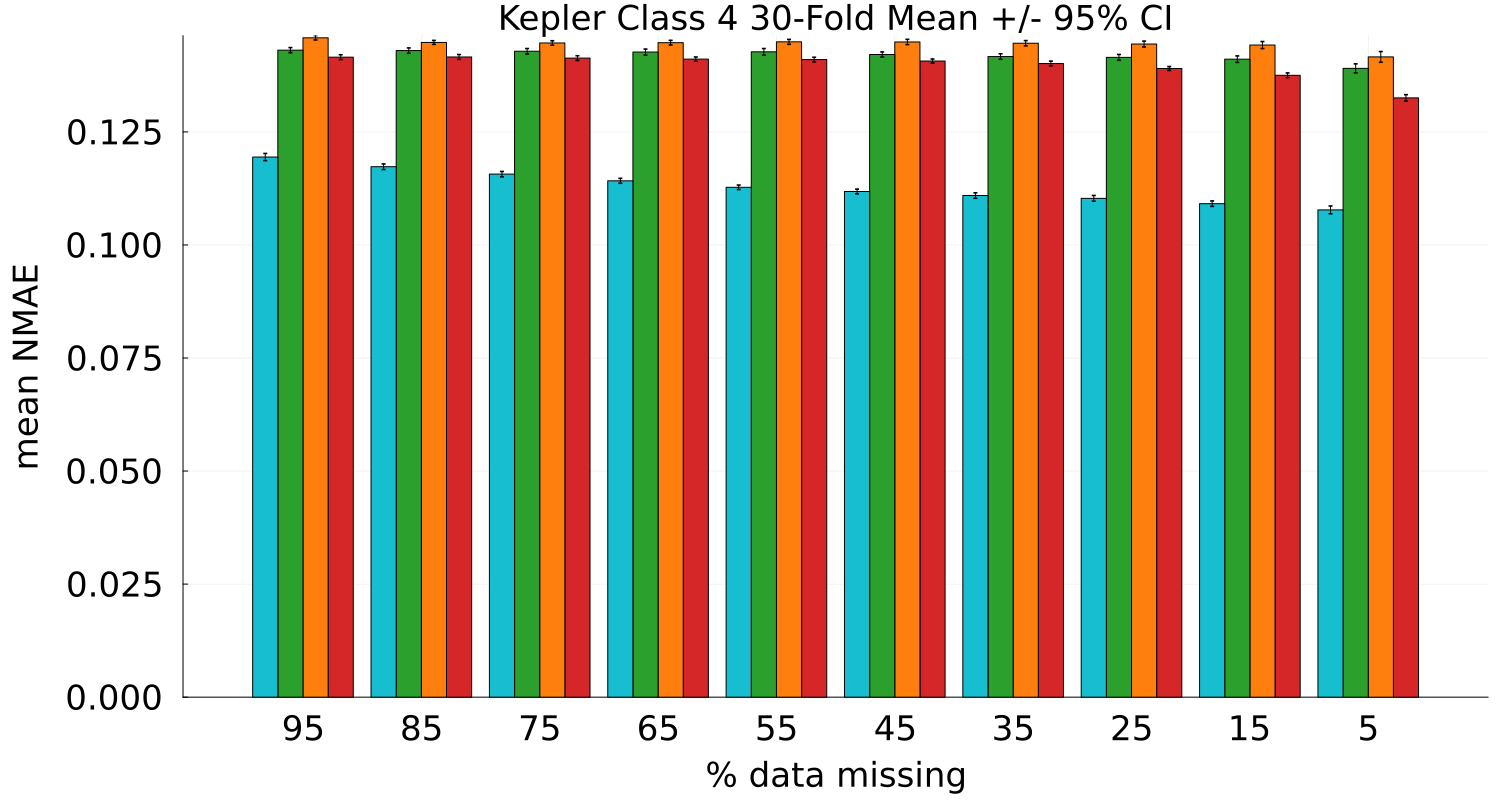

In [46]:
fstyle = font("sans-serif", 23)
groupedbar([mps_per_pm_30fold_mean_n_c4 nn_per_pm_30fold_mean_n_c4 csdi_per_pm_30fold_mean_c4 cdrec_per_pm_30fold_mean_c4], 
    yerr=[1.96*mps_per_pm_30fold_std_err_n_c4 1.96*nn_per_pm_30fold_std_err_n_c4 1.96*csdi_per_pm_30fold_std_err_c4 1.96*cdrec_per_pm_30fold_std_err_c4],
    markersize=2,
    legend=:none, #:outertopright,
    bar_width=0.85,
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    c=[pal[4] pal[2] pal[3] pal[10]],
    label=["MPS" "1-NNI" "CSDI" "CDRec"],
    title="Kepler Class 4 30-Fold Mean +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean NMAE", 
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,size=(1500, 800),
    bottom_margin=10mm,
    left_margin=10mm)
xflip!(true)
#savefig("kepler_combined_imputation_barplot_4impute.svg")

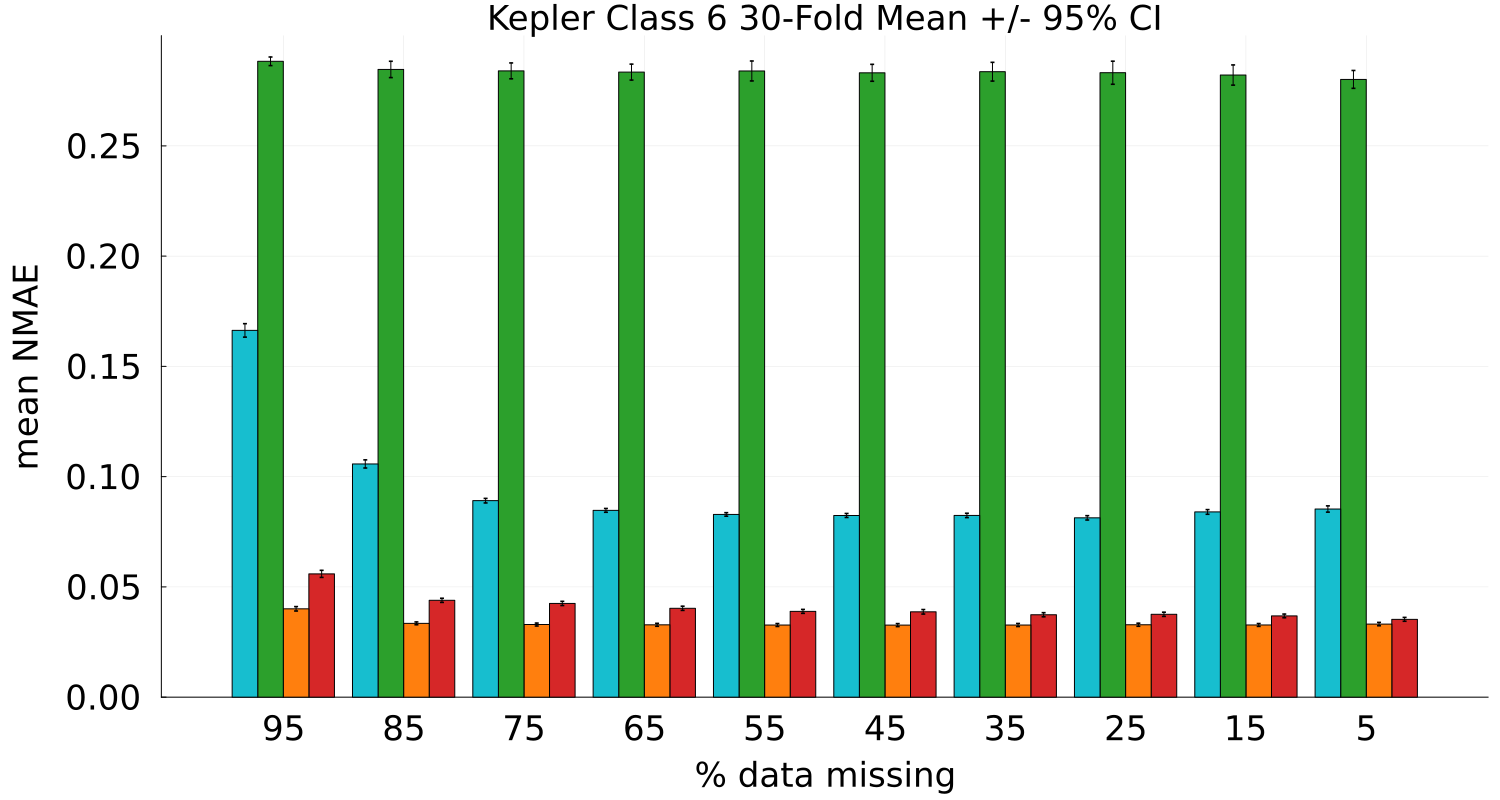

In [47]:
groupedbar([mps_per_pm_30fold_mean_n_c6 nn_per_pm_30fold_mean_n_c6 csdi_per_pm_30fold_mean_c6 cdrec_per_pm_30fold_mean_c6], 
    yerr=[1.96*mps_per_pm_30fold_std_err_n_c6 1.96*nn_per_pm_30fold_std_err_n_c6 1.96*csdi_per_pm_30fold_std_err_c6 1.96*cdrec_per_pm_30fold_std_err_c6],
    markersize=2,
    legend=:none, #:outertopright,
    bar_width=0.85,
    ylims=(0.0, 0.3),
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    c=[pal[4] pal[2] pal[3] pal[10]],
    label=["MPS" "1-NNI" "CSDI" "CDRec"],
    title="Kepler Class 6 30-Fold Mean +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean NMAE", 
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,size=(1500, 800),
    bottom_margin=10mm,
    left_margin=10mm)
xflip!(true)

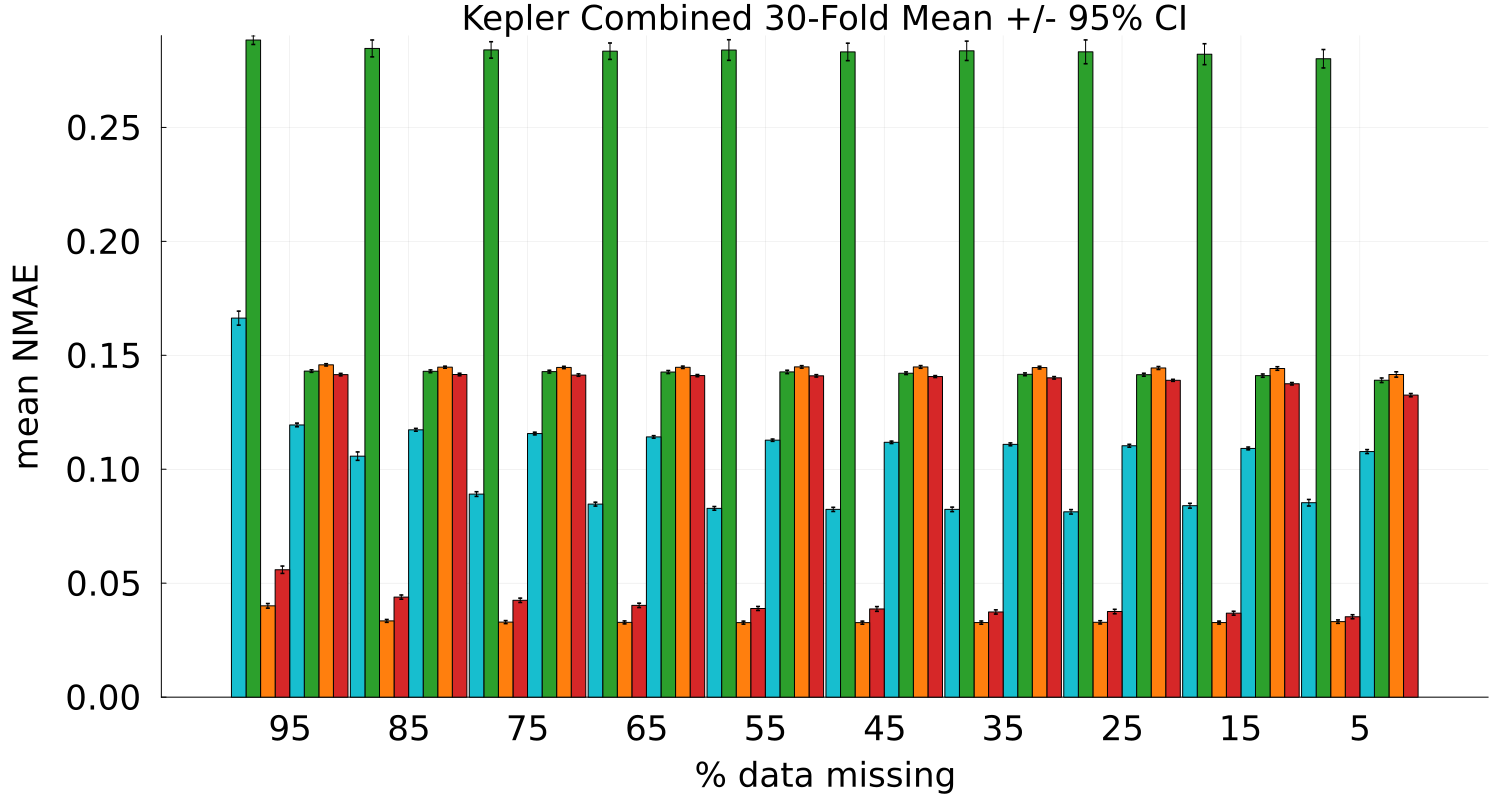

In [48]:
groupedbar([[mps_per_pm_30fold_mean_n_c4 nn_per_pm_30fold_mean_n_c4 csdi_per_pm_30fold_mean_c4 cdrec_per_pm_30fold_mean_c4] [mps_per_pm_30fold_mean_n_c6 nn_per_pm_30fold_mean_n_c6 csdi_per_pm_30fold_mean_c6 cdrec_per_pm_30fold_mean_c6]], 
    yerr=[[1.96*mps_per_pm_30fold_std_err_n_c4 1.96*nn_per_pm_30fold_std_err_n_c4 1.96*csdi_per_pm_30fold_std_err_c4 1.96*cdrec_per_pm_30fold_std_err_c4] [1.96*mps_per_pm_30fold_std_err_n_c6 1.96*nn_per_pm_30fold_std_err_n_c6 1.96*csdi_per_pm_30fold_std_err_c6 1.96*cdrec_per_pm_30fold_std_err_c6]],
    markersize=2,
    legend=:none, #:outertopright,
    bar_width=0.98,
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    c=[pal[4] pal[2] pal[3] pal[10]],
    label=["MPS" "1-NNI" "CSDI" "CDRec"],
    title="Kepler Combined 30-Fold Mean +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean NMAE", 
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,size=(1500, 800),
    bottom_margin=10mm,
    left_margin=10mm)
xflip!(true)
#savefig("kepler_combined_imputation_barplot_4impute_layout2.svg")

In [49]:
pm = collect(5:10:95);

In [50]:
kepler_results = Dict()
c4_res = Dict()
c4_res_mps = Dict()
c4_res_mps["pm"] = pm
c4_res_mps["means"] = mps_per_pm_30fold_mean_n_c4
c4_res_mps["std_errors"] = mps_per_pm_30fold_std_err_n_c4
c4_res_nn = Dict()
c4_res_nn["pm"] = pm
c4_res_nn["means"] = nn_per_pm_30fold_mean_n_c4
c4_res_nn["std_errors"] = nn_per_pm_30fold_std_err_n_c4
c4_res_brits = Dict()
c4_res_brits["pm"] = pm
c4_res_brits["means"] = brits_per_pm_30fold_mean_c4
c4_res_brits["std_errors"] = brits_per_pm_30fold_std_err_c4
c4_res_cdrec = Dict()
c4_res_cdrec["pm"] = pm 
c4_res_cdrec["means"] = cdrec_per_pm_30fold_mean_c4
c4_res_cdrec["std_errors"] = cdrec_per_pm_30fold_std_err_c4
c4_res_csdi = Dict()
c4_res_csdi["pm"] = pm 
c4_res_csdi["means"] = csdi_per_pm_30fold_mean_c4
c4_res_csdi["std_errors"] = csdi_per_pm_30fold_std_err_c4
c4_res["mps"] = c4_res_mps
c4_res["nn"] = c4_res_nn
c4_res["brits"] = c4_res_brits
c4_res["cdrec"] = c4_res_cdrec
c4_res["csdi"] = c4_res_csdi

Dict{Any, Any} with 3 entries:
  "std_errors" => [0.000506548, 0.000366065, 0.000325624, 0.0003102, 0.00028953…
  "pm"         => [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]
  "means"      => [0.13906, 0.141091, 0.141486, 0.14167, 0.142125, 0.142714, 0.…

In [51]:
c6_res = Dict()
c6_res_mps = Dict()
c6_res_mps["pm"] = pm
c6_res_mps["means"] = mps_per_pm_30fold_mean_n_c6
c6_res_mps["std_errors"] = mps_per_pm_30fold_std_err_n_c6
c6_res_nn = Dict()
c6_res_nn["pm"] = pm
c6_res_nn["means"] = nn_per_pm_30fold_mean_n_c6
c6_res_nn["std_errors"] = nn_per_pm_30fold_std_err_n_c6
c6_res_brits = Dict()
c6_res_brits["pm"] = pm
c6_res_brits["means"] = brits_per_pm_30fold_mean_c6
c6_res_brits["std_errors"] = brits_per_pm_30fold_std_err_c6
c6_res_cdrec = Dict()
c6_res_cdrec["pm"] = pm
c6_res_cdrec["means"] = cdrec_per_pm_30fold_mean_c6
c6_res_cdrec["std_errors"] = cdrec_per_pm_30fold_std_err_c6
c6_res_csdi = Dict()
c6_res_csdi["pm"] = pm
c6_res_csdi["means"] = csdi_per_pm_30fold_mean_c6
c6_res_csdi["std_errors"] = csdi_per_pm_30fold_std_err_c6
c6_res["mps"] = c6_res_mps
c6_res["nn"] = c6_res_nn
c6_res["brits"] = c6_res_brits
c6_res["cdrec"] = c6_res_cdrec
c6_res["csdi"] = c6_res_csdi

Dict{Any, Any} with 3 entries:
  "std_errors" => [0.00206253, 0.00233631, 0.00266228, 0.00216558, 0.00195966, …
  "pm"         => [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]
  "means"      => [0.280141, 0.282135, 0.283171, 0.283627, 0.283136, 0.283956, …

In [52]:
kepler_results["c4"] = c4_res
kepler_results["c6"] = c6_res

Dict{Any, Any} with 5 entries:
  "cdrec" => Dict{Any, Any}("std_errors"=>[0.000728931, 0.000539167, 0.00049877…
  "brits" => Dict{Any, Any}("std_errors"=>[0.565825, 1.49258, 1.73632, 1.85143,…
  "csdi"  => Dict{Any, Any}("std_errors"=>[0.00206253, 0.00233631, 0.00266228, …
  "nn"    => Dict{Any, Any}("std_errors"=>[0.000381574, 0.000326987, 0.00035865…
  "mps"   => Dict{Any, Any}("std_errors"=>[0.000449226, 0.000427556, 0.00049194…

# Load BRITSI results

In [53]:
#JLD2.@save "kepler_results_paper.jld2" kepler_results

In [106]:
kep_c4_britsi = JSON.parsefile("Python/KEPC4_britsi.json");
kep_c4_britsi_means = float.(kep_c4_britsi["means"])
kep_c4_britsi_std = float.(kep_c4_britsi["stds"])
kep_c6_britsi = JSON.parsefile("Python/KEPC6_britsi.json");
kep_c6_britsi_means = float.(kep_c6_britsi["means"])
kep_c6_britsi_std = float.(kep_c6_britsi["stds"])

10-element Vector{Float64}:
 0.011144321176456872
 0.011968813497367918
 0.011570791340381373
 0.013580848092781213
 0.03434122794656298
 0.03320861729074187
 0.03233512174877623
 0.04235470878637915
 0.04812949849485234
 0.053475810103036946

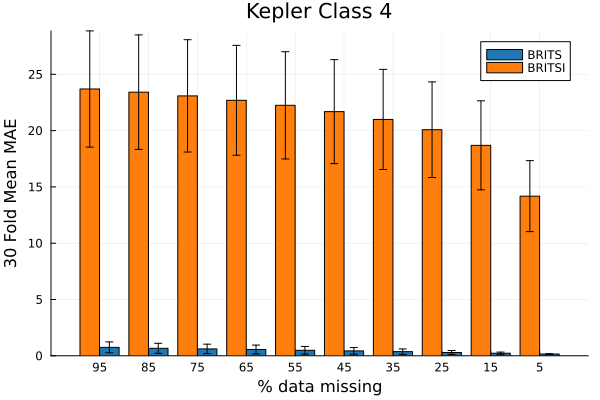

In [144]:
groupedbar([brits_per_pm_30fold_mean_c4 kep_c4_britsi_means],
    yerr=[brits_per_pm_30fold_std_err_c4*1.96 kep_c4_britsi_std*1.96/sqrt(30)],
    c=[pal[1] pal[2]],
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["BRITS" "BRITSI"],
    xlabel="% data missing",
    ylabel="30 Fold Mean MAE",
    title="Kepler Class 4", 
    legend=:topright)
xflip!(true)
#savefig("kepler_c4_brits_vs_britsi.svg")

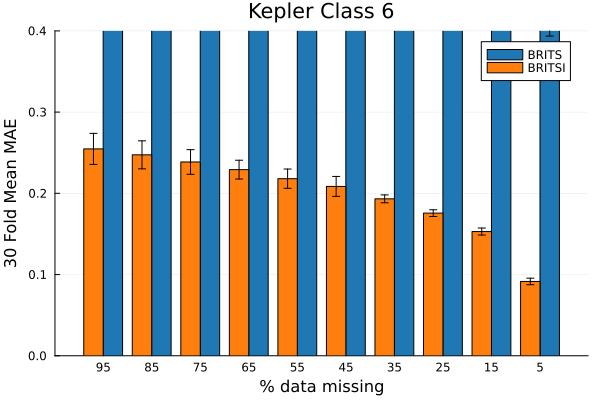

In [149]:
groupedbar([brits_per_pm_30fold_mean_c6 kep_c6_britsi_means],
    yerr=[brits_per_pm_30fold_std_err_c6*1.96 kep_c6_britsi_std*1.96/sqrt(30)],
    c=[pal[1] pal[2]],
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    label=["BRITS" "BRITSI"],
    xlabel="% data missing",
    ylabel="30 Fold Mean MAE",
    title="Kepler Class 6", 
    ylims=(0, 0.4))
xflip!(true)
#savefig("kepler_c6_brits_vs_britsi.svg")

In [140]:
# CDREC CSDI MPS 1NNI BRITS
cdr_c = pal[10]
csdi_c = pal[3]
mps_c = pal[4]
nni_c = pal[2]
brits_c = pal[5]
group_colours = [mps_c nni_c csdi_c cdr_c brits_c]

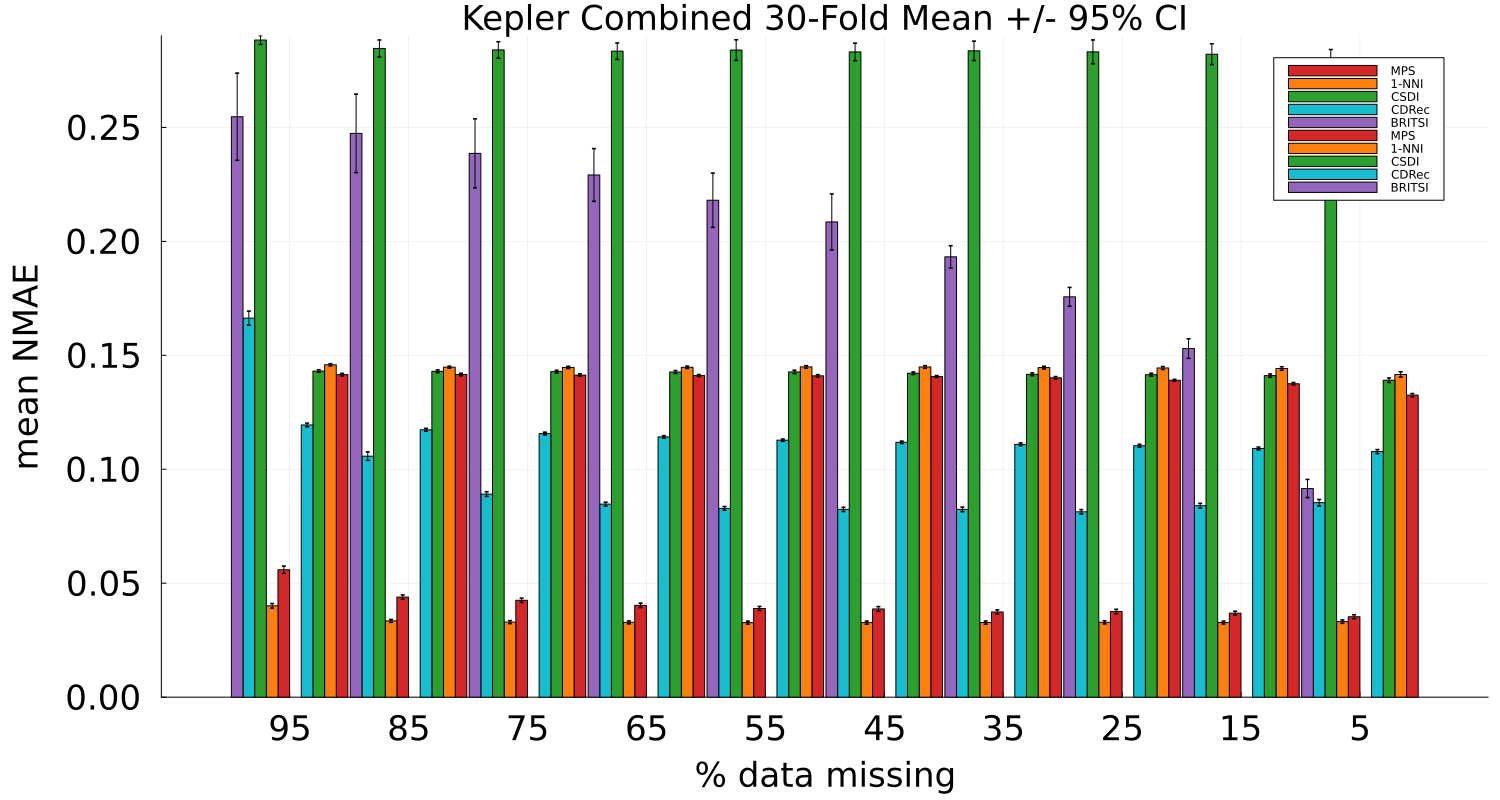

In [141]:
groupedbar([[mps_per_pm_30fold_mean_n_c4 nn_per_pm_30fold_mean_n_c4 csdi_per_pm_30fold_mean_c4 cdrec_per_pm_30fold_mean_c4 fill(NaN, 10)] [mps_per_pm_30fold_mean_n_c6 nn_per_pm_30fold_mean_n_c6 csdi_per_pm_30fold_mean_c6 cdrec_per_pm_30fold_mean_c6 kep_c6_britsi_means]], 
    yerr=[[1.96*mps_per_pm_30fold_std_err_n_c4 1.96*nn_per_pm_30fold_std_err_n_c4 1.96*csdi_per_pm_30fold_std_err_c4 1.96*cdrec_per_pm_30fold_std_err_c4 fill(NaN, 10)] [1.96*mps_per_pm_30fold_std_err_n_c6 1.96*nn_per_pm_30fold_std_err_n_c6 1.96*csdi_per_pm_30fold_std_err_c6 1.96*cdrec_per_pm_30fold_std_err_c6 kep_c6_britsi_std*1.96/sqrt(30)]],
    markersize=2,
    legend=:topright, #:outertopright,
    bar_width=0.98,
    xticks=([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ["5", "15", "25", "35", "45", "55", "65", "75", "85", "95"]),
    c=group_colours,
    label=["MPS" "1-NNI" "CSDI" "CDRec" "BRITSI"],
    title="Kepler Combined 30-Fold Mean +/- 95% CI",
    xlabel="% data missing",
    ylabel="mean NMAE", 
    xtickfont=fstyle,
    ytickfont=fstyle,
    guidefont=fstyle,
    titlefont=fstyle,size=(1500, 800),
    bottom_margin=10mm,
    left_margin=10mm)
xflip!(true)